In [1]:
# Directories
import os
os.chdir(r"E:\academy\OneDrive - IIT Delhi\3. IIT DELHI\2. Academics\1_PAPER\2_Analysis")
print(os.getcwd())


E:\academy\OneDrive - IIT Delhi\3. IIT DELHI\2. Academics\1_PAPER\2_Analysis


In [2]:
#Array packages
import cartopy.crs as ccrs
import pandas as pd
import numpy as np
import xarray as xr
import netCDF4 as nc4

from scipy.stats import kendalltau
import pymannkendall as mk

#plots
import matplotlib.pyplot as plt
import rioxarray as rio
import geopandas as gpd
from shapely.geometry import mapping
import matplotlib.ticker as ticker
from matplotlib.ticker import MultipleLocator

#Progress meter
from dask.diagnostics import ProgressBar
from tqdm import tqdm

# Directories
import os
import glob
import dask
#import h5netcdf
import scipy


#Trend
import xarrayMannKendall as XMK
import dask
from dask import delayed
import graphviz


## 1 Trend fulltimeseries

In [57]:
mdl=4
model=["LIS_MERRA2","LIS_IMD","LIS_CHIRPS","LIS_ERA5","LIS_IMDc"]
lsm_M = xr.open_mfdataset(f'DATA_p/LIS/{model[mdl]}/{model[mdl]}_grid_All.nc',engine='netcdf4', parallel=True,chunks={'time': 'auto'})

var=['TotalPrecip_tavg','Evap_tavg','Qs_tavg','RE']
var1=['P','ET','Q','RE']
result1=[]
for vr in tqdm(range(4)):

        ds=lsm_M[var[vr]]
        ds=ds.rename({'time':'time', 'lon': 'x','lat': 'y'})

        
        MK_test = XMK.Mann_Kendall_test(ds, 'time')
        xrr1=MK_test.compute()
        xrr1['trend']=xrr1.trend.where(xrr1.signif==1)    #To REMOVE NON SIGNIFICANT POINTS
        result1.append(xrr1)

  0%|                                                                                            | 0/4 [00:00<?, ?it/s]C:\Users\sstar\AppData\Local\Temp\ipykernel_22556\4255627436.py:11: UserWarning: rename 'time' to 'time' does not create an index anymore. Try using swap_dims instead or use set_index after rename to create an indexed coordinate.
  ds=ds.rename({'time':'time', 'lon': 'x','lat': 'y'})
 25%|████████████████████▊                                                              | 1/4 [03:22<10:08, 202.85s/it]C:\Users\sstar\AppData\Local\Temp\ipykernel_22556\4255627436.py:11: UserWarning: rename 'time' to 'time' does not create an index anymore. Try using swap_dims instead or use set_index after rename to create an indexed coordinate.
  ds=ds.rename({'time':'time', 'lon': 'x','lat': 'y'})
 50%|█████████████████████████████████████████▌                                         | 2/4 [10:20<10:58, 329.07s/it]C:\Users\sstar\AppData\Local\Temp\ipykernel_22556\4255627436.py:11: UserW

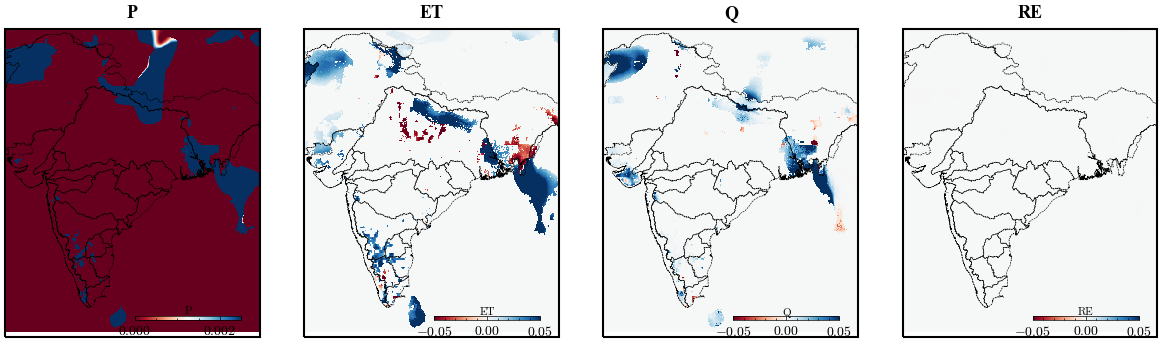

In [49]:
fig, axs = plt.subplots(1,4,subplot_kw={'projection': ccrs.PlateCarree()},figsize=(15,4),constrained_layout=False)
axs=axs.flatten()

for i in range(len(result1)):

    xrr=result1[i].trend
    Map_plot1(xrr,fig,axs[i],var1[i],var1[i])
    
#plt.savefig(f'3_RE_trnd/outputs/grids/All_{model[mdl]}.jpeg', bbox_inches='tight')   

<xarray.DataArray 'trend' (y: 320, x: 300)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])
Coordinates:
  * x        (x) float64 68.05 68.15 68.25 68.35 ... 97.65 97.75 97.85 97.95
  * y        (y) float64 5.55 5.65 5.75 5.85 5.95 ... 37.15 37.25 37.35 37.45

In [ ]:
V = np.repeat([[-0.01, 0.01], [-0.01, 0.01], [-0.01, 0.01],[-0.0001, 0.0001]], 4, axis=0)
Map_plot3(result,[4,4],V,var_ssn)
plt.savefig(f'3_Trend_analysis/outputs/trend_{model[mdl]}.jpeg', bbox_inches='tight')
plt.show()

## 2_Trend seasonal 

In [7]:
mdl=1
model=["LIS_MERRA2","LIS_IMD","LIS_CHIRPS","LIS_ERA5","LIS_IMDc"]
lsm_M = xr.open_mfdataset(f'DATA_p/LIS/{model[mdl]}/{model[mdl]}_grid_ssn.nc',engine='netcdf4', parallel=True,chunks={'time': 'auto'})

var=['TotalPrecip_tavg','Evap_tavg','Qs_tavg','RE']
var1=['P','ET','Q','RE']

ssn=['Pre-monsoon','Monsoon','Post-monsoon','Winter']
var_ssn = [[a, b] for a in var1 for b in ssn]
ssn_m=[[3,4,5],[6,7,8,9],[10,11],[12,1,2,3]]


result=[]
for vr in tqdm(range(4)):
    for ss in range(4):
        
        ds=lsm_M[var[vr]]
    
        ds1=ds.isel(season=ss)
        ds1=ds1.rename({'year':'time', 'lon': 'x','lat': 'y'})
        
        MK_test = XMK.Mann_Kendall_test(ds1, 'time')
        xrr2=MK_test.compute()
        #xrr2['trend']=xrr2.trend.where(xrr2.signif==1,0)    #To REMOVE NON SIGNIFICANT POINTS
        result.append(xrr2)

  0%|                                                                                            | 0/4 [00:00<?, ?it/s]C:\Users\sstar\anaconda3\envs\imed\Lib\site-packages\scipy\stats\_stats_mstats_common.py:181: RuntimeWarning: invalid value encountered in scalar divide
  slope = ssxym / ssxm
C:\Users\sstar\anaconda3\envs\imed\Lib\site-packages\scipy\stats\_stats_mstats_common.py:195: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
C:\Users\sstar\anaconda3\envs\imed\Lib\site-packages\scipy\stats\_stats_mstats_common.py:198: RuntimeWarning: invalid value encountered in scalar divide
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)
 50%|█████████████████████████████████████████▌                                         | 2/4 [05:55<05:55, 177.80s/it]C:\Users\sstar\anaconda3\envs\imed\Lib\site-packages\xarrayMannKendall\xarrayMannKendall.py:104: RuntimeWarning: divide by zero encountered in scalar divide
  z = (self.scor

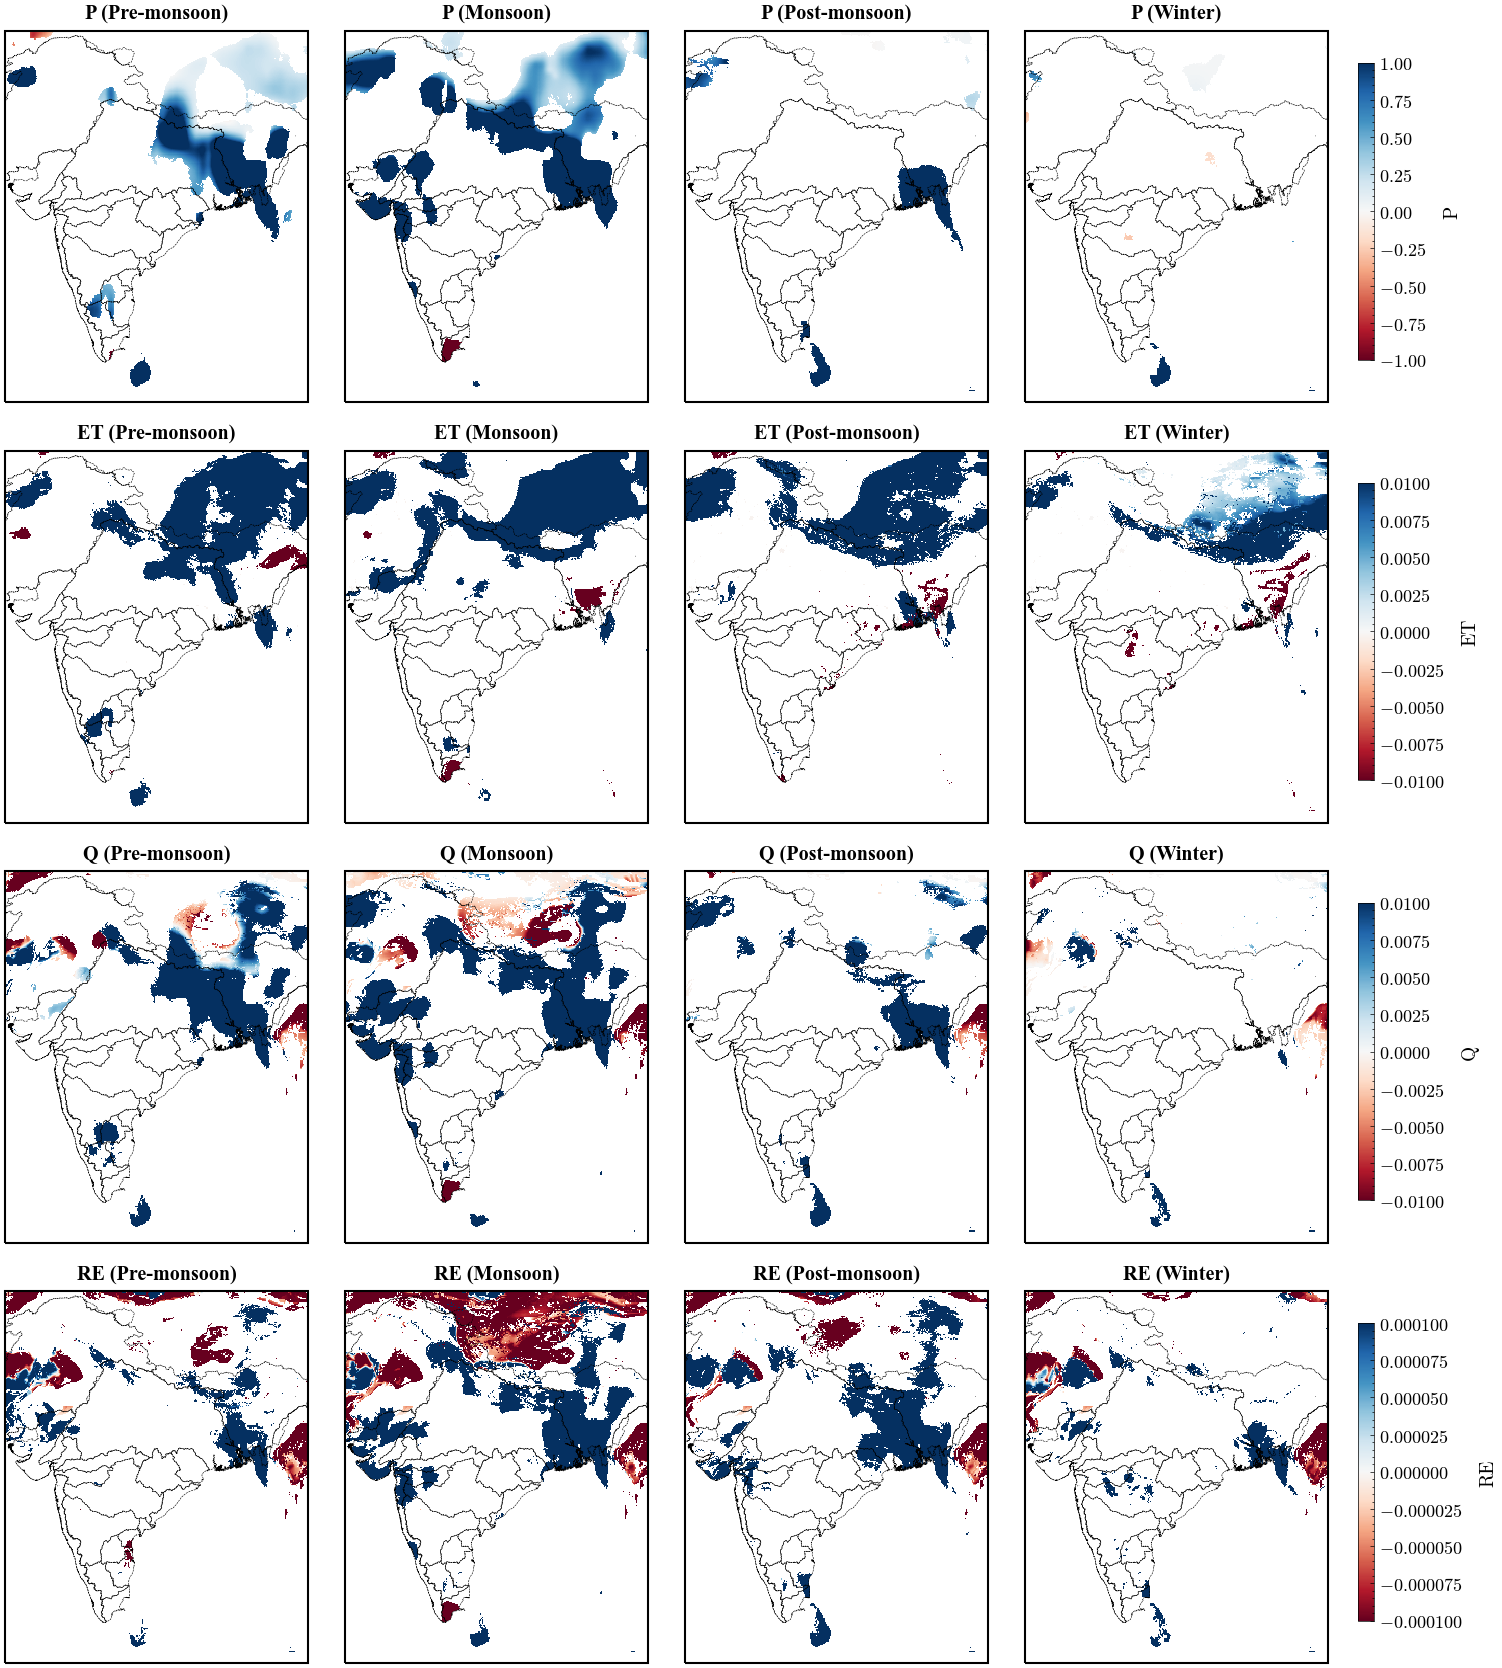

In [6]:
V = np.repeat([[-1, 1], [-0.01, 0.01], [-0.01, 0.01],[-0.0001, 0.0001]], 4, axis=0)
Map_plot2(result,[4,4],V,var_ssn)
plt.savefig(f'3_RE_trnd/outputs/grids/ssn_{model[mdl]}.jpeg', bbox_inches='tight')
plt.show()

# Function

In [4]:
## Single map function
def Map_plot1(xrr1,fig,axs,plt_tit,cbar_tit):

    vmin1=xrr1.quantile(0.1)
    vmax1=xrr1.quantile(0.9)
    cmap1='RdBu'
    
# Step 3 : Figure axis confiureations   
    fig.subplots_adjust(bottom=None, left=None, top=None, right=None, wspace=0.13, hspace=0.13) 
    [x.set_linewidth(1.5) for x in axs.spines.values()]
    axs.set_extent([67.90, 97,5, 37.50], ccrs.PlateCarree())

   
    lf=axs.get_position().x0
    bt=axs.get_position().y0
    wd=axs.get_position().width
    hg=axs.get_position().height


# Step 5 : Plotting the data
    basin_map = gpd.read_file('DATA_p/Shapefiles/Indian_basin/India_transboundary.shp')
    #ind_map = gpd.read_file('DATA/Shapefiles/Indian_map/India_country.shp')
    Main_plot=xrr1.plot(vmin=vmin1,vmax=vmax1,ax=axs,cmap=cmap1,add_labels=False,add_colorbar=False) 
    basin_map.plot(ax=axs,color = 'none',edgecolor = 'black',linewidth=.4,linestyle='--')
    
    axs.set_title(plt_tit,fontsize=13,pad=8,fontname='Times New Roman',weight='bold')
    
# Step 4: Colourbar settings   
    
    
    
    cbar_ax = fig.add_axes([lf+wd*0.51, bt + 0.029, wd-wd*0.6, 0.1])
    cbar=plt.colorbar(Main_plot,cax=cbar_ax, orientation="horizontal",extend='neither', label = "prec") #,label = cbar_tit

    #cbar.ax.tick_params(axis='both', labelsize=13) 

    cbar.set_label(cbar_tit, fontsize=wd*45, labelpad=-wd*130,weight="bold")#position=(0.5, -0.5)
    


In [3]:
## Single map function
def Map_plot2(xrr,col_row,V,plt_tit):
    import numpy as np 
    import matplotlib.pyplot as plt
    import cartopy.crs as ccrs
    import cartopy.feature as cfeature
    import geopandas as gpd
    import matplotlib
    import xarray as xr
    from matplotlib.colors import LinearSegmentedColormap
    import matplotlib.colors as clr
    import scienceplots
    plt.style.use(['science','no-latex','bright'])
    
    c=col_row[1]
    r=col_row[0]
    B=5
    lt = 0  # bottom space
    fig_len=c*5 + lt
    fig_hg=r*5.3
    fnt = B*3.2
    pd = B*1.5
    ln_wd = B*0.2
    
    fig, axs = plt.subplots(c,r,subplot_kw={'projection': ccrs.PlateCarree()},figsize=(fig_len,fig_hg),constrained_layout=False)
    axs=axs.flatten()

   

    for i in range(len(xrr)):    

        Kwarg = {
        'cmap': 'RdBu',
        'vmin': V[i][0],    # Minimum value for the colormap
        'vmax': V[i][1],     # Maximum value for the colormap
        'alpha': 1,  # Transparency
         }
        
        # Step 3 : Figure axis confiureations   
        fig.subplots_adjust(bottom=None, left=None, top=None, right=0.8, wspace=0.03, hspace=0.13) 
        [x.set_linewidth(1.5) for x in axs[i].spines.values()]
        axs[i].set_extent([67.90, 97,4.5, 37.50], ccrs.PlateCarree())
    
        lf=axs[i].get_position().x0
        bt=axs[i].get_position().y0
        wd=axs[i].get_position().width
        hg=axs[i].get_position().height
    
        # Step 5 : Plotting the data
        basin_map = gpd.read_file('DATA_p/Shapefiles/Indian_basin/India_transboundary.shp')

        xrr[i]=xrr[i].where(xrr[i].signif==1)  
        Main_plot=xrr[i].trend.plot(ax=axs[i],**Kwarg,add_labels=False,add_colorbar=False) 
        basin_map.plot(ax=axs[i],color = 'none',edgecolor = 'black',linewidth=.4,linestyle='--')
        
        axs[i].set_title(f"{plt_tit[i][0]} ({plt_tit[i][1]})",fontsize=B*2.9,pad=1.8*B,fontname='Times New Roman',weight='bold')
        
        # Step 4: Colourbar settings   
        if (i+1) % 4 == 0:  # Check if a is a multiple of 4
            cbar_ax = fig.add_axes([lf+wd+0.009, bt+0.02 , 0.008, hg-0.2*hg])
            cbar=plt.colorbar(Main_plot,cax=cbar_ax, orientation="vertical",extend='neither', label = "prec") #,label = cbar_tit
            cbar.set_label(plt_tit[i][0], fontsize=B*2.8, labelpad=B*2.4,weight="bold")#position=(0.5, -0.5)
            cbar.ax.tick_params(labelsize=13) 
